In [1]:
# Libraries and utilities

# RENINDER: FARE FIT.TRANSFORM SOLO SU TRAINING E DOPO SUL TEST SOLO .TRANSFORM
# REMINDER: NORMALIZZARE PRIMA DI FARE TUTTO IL PREPROCESSING 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [2]:
df_train=pd.read_csv("./Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("./Dataset_prepared/Prepared_test.csv")


In [3]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
#df_train.drop('Unnamed: 0',axis=1,inplace=True)


df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)
#df_test.drop('Unnamed: 0',axis=1,inplace=True)






In [4]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


FACCIAMO LA CLASSIFICAZIONE NORMALE 

In [5]:
df_train_c = df_train.copy()
df_test_c = df_test.copy()



LABEL ENCODING TRAIN FOR NORMAL CLASSIFICATION + NORMALIZATION

In [6]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train_c[i]=le.fit_transform(df_train_c[i])
categorical_col = ["emotion"]

df_train_c = pd.get_dummies(df_train_c, columns=categorical_col)    

df_train_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


In [7]:
numeric_features = [n for n in df_train_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_c[numeric_features])
df_train_c[numeric_features] = scaled_features
df_train_c.head()


col = [x for x in df_train_c.columns if x!='emotional_intensity']
X_train=df_train_c[col].values
y_train = np.array(df_train_c["emotional_intensity"])






LABEL ENCODING TEST FOR NORMAL CLASSIFICATION + NORMALIZATION

In [8]:
for i in cat_var:
    df_test_c[i]=le.fit_transform(df_test_c[i])
categorical_col = ["emotion"]

df_test_c = pd.get_dummies(df_test_c, columns=categorical_col)    

df_test_c.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [9]:
numeric_features = [n for n in df_test_c.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]


scaled_features = scaler.transform(df_test_c[numeric_features])
df_test_c[numeric_features] = scaled_features
df_test_c.head()


col = [x for x in df_test_c.columns if x!='emotional_intensity']
X_test=df_test_c[col].values
y_test = np.array(df_test_c["emotional_intensity"])






GRID SEARCH PER LA CLASSIFICAZIONE NORMALE

In [10]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [11]:
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 5}


In [12]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [13]:
print(grid.best_params_)

{'metric': 'cityblock', 'n_neighbors': 20, 'weights': 'distance'}


TESTIAMO I NOSTRI MODELLI :D

In [14]:
learner_KNN = KNeighborsClassifier(n_neighbors= 20, metric= 'cityblock', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       336
           1       0.80      0.45      0.58       288

    accuracy                           0.70       624
   macro avg       0.73      0.68      0.67       624
weighted avg       0.72      0.70      0.68       624



In [15]:
learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=15,min_samples_split=5)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       336
           1       0.66      0.66      0.66       288

    accuracy                           0.69       624
   macro avg       0.69      0.69      0.69       624
weighted avg       0.69      0.69      0.69       624



VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TRAINING

In [16]:
df_train['emotional_intensity'].value_counts()

normal    984
strong    844
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

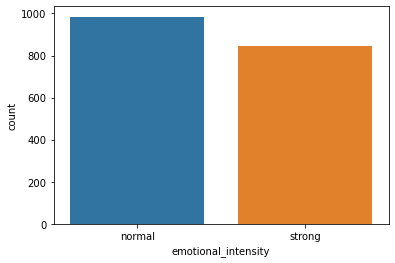

In [17]:
sns.countplot(data=df_train,x='emotional_intensity')

PROVO A SBILANCIARE

In [18]:
df_copy_train = df_train.copy()
#df_copy_train.drop('emotional_intensity',axis=1,inplace=True)

In [19]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_train[ df_train['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_train.drop(indexNames,axis=0,inplace=True)






# Uniamo i dati selezionati con il restante 90% dei valori "normal"
#df_copy_train = pd.concat([df_train.loc[df_train['emotional_intensity'] == 'normal'], strong])



In [20]:
# Stampa della nuova proporzione di valori

print(df_copy_train['emotional_intensity'].value_counts(normalize=True))


normal    0.943432
strong    0.056568
Name: emotional_intensity, dtype: float64


In [21]:
df_copy_train['emotional_intensity'].value_counts()

normal    984
strong     59
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

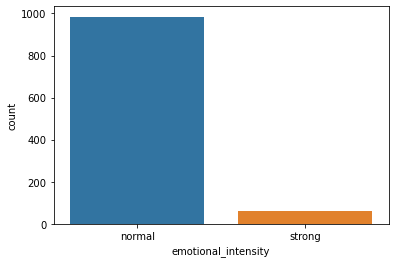

In [22]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

In [23]:
df_copy_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.0,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.0,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.0,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.0,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.0,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [24]:
df_copy_train.shape

(1043, 259)

VERIFICHIAMO I VALORI DI EMOTIONAL INTENSITY NEL TEST E SBILANCIAMO


In [25]:
df_test['emotional_intensity'].value_counts()

normal    336
strong    288
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

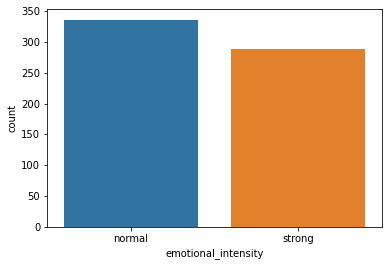

In [26]:
sns.countplot(data=df_test,x='emotional_intensity')

In [27]:
df_copy_test = df_test.copy()


In [28]:
# Selezioniamo solo il 10% dei valori "strong"
#strong = df_train.loc[df_train['emotional_intensity'] == 'strong'].sample(frac=0.9)
#strong 
indexNames = df_test[ df_test['emotional_intensity'] == 'strong' ].sample(frac=0.93).index
df_copy_test.drop(indexNames,axis=0,inplace=True)




In [29]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [30]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

In [31]:
# Stampa della nuova proporzione di valori

print(df_copy_test['emotional_intensity'].value_counts(normalize=True))


normal    0.94382
strong    0.05618
Name: emotional_intensity, dtype: float64


In [32]:
df_copy_test['emotional_intensity'].value_counts()

normal    336
strong     20
Name: emotional_intensity, dtype: int64

<AxesSubplot:xlabel='emotional_intensity', ylabel='count'>

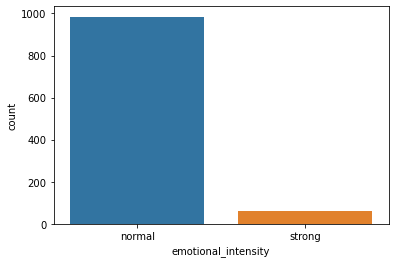

In [33]:
sns.countplot(data=df_copy_train,x='emotional_intensity')

LABEL ENCODING  TRAINING

In [34]:
c=df_copy_train.select_dtypes(include=['object']).columns.tolist()
c

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [35]:
cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy_train[i]=le.fit_transform(df_copy_train[i])
categorical_col = ["emotion"]

df_copy_train = pd.get_dummies(df_copy_train, columns=categorical_col)    

df_copy_train.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,9.150000e-07,-0.000031,0.0,0.0,15.028520,...,6.742190,-1.706215,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.137790e-07,-0.000031,0.0,0.0,16.488415,...,-0.700420,-0.201495,0,0,0,0,0,1,0,0
2,1,0,0,0,1,9.554485e-07,0.000000,0.0,0.0,17.035218,...,1.688986,-1.024773,0,0,0,0,0,1,0,0
3,1,0,0,1,1,9.176213e-07,-0.000031,0.0,0.0,21.824521,...,-0.594111,-0.412871,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.108948e-07,-0.000031,0.0,0.0,13.236022,...,0.126535,-0.620782,0,1,0,0,0,0,0,0


INTRODUCO LE LIBRERIE DI UNDER/OVER + DIM_RED

In [36]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from collections import Counter
from sklearn.decomposition import PCA




NORMALIZZAZIONE TRAINING

In [37]:
numeric_features = [n for n in df_copy_train.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy_train[numeric_features])
df_copy_train[numeric_features] = scaled_features
df_copy_train.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_train=df_copy_train[col].values
y_train = np.array(df_copy_train["emotional_intensity"])






NORMALIZZAZIONE + LABEL ENCODING + HOLDOUT TEST

In [38]:
for i in cat_var:
    df_copy_test[i]=le.fit_transform(df_copy_test[i])
categorical_col = ["emotion"]

df_copy_test = pd.get_dummies(df_copy_test, columns=categorical_col)    

df_copy_test.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,kur,...,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,2.940224e-06,-0.000092,0.0,0.000153,11.392131,...,-0.260279,-0.566556,0,0,0,0,0,1,0,0
1,1,0,1,1,1,7.733752e-07,-0.000122,0.0,0.000153,13.621589,...,-0.428900,-0.587210,0,0,0,0,0,1,0,0
2,1,0,0,0,1,-3.741909e-06,-0.000061,0.0,0.000092,7.678162,...,0.626916,-0.883317,0,0,0,0,0,1,0,0
3,1,0,0,1,1,-5.069646e-07,-0.000092,0.0,0.000122,14.511231,...,-0.825144,-0.383701,0,0,0,0,0,1,0,0
4,1,0,1,0,1,8.640319e-07,-0.000061,0.0,0.000122,8.944732,...,-0.536669,-0.547354,0,1,0,0,0,0,0,0


In [39]:
scaled_features = scaler.transform(df_copy_test[numeric_features])
df_copy_test[numeric_features] = scaled_features
df_copy_test.head()


col = [x for x in df_copy_train.columns if x!='emotional_intensity']
X_test=df_copy_test[col].values
y_test = np.array(df_copy_test["emotional_intensity"])


ISTANZIO LA GRID SEARCH PER IL KNN E IL DT 

In [40]:
param_grid = {'max_depth': [None, 2, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [41]:
print(grid.best_params_)

{'max_depth': 2, 'min_samples_leaf': 15, 'min_samples_split': 2}


In [42]:
param_grid = {
    "n_neighbors": np.arange(2,51),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock","minkowski"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=StratifiedKFold(), # with no parameters it is with 5 split and 10 repetitions
    refit=True,
    scoring="f1_macro"
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [43]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


RISULTATI NORMALI

In [44]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
classifier = learner_KNN.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))
#learner_DT= DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=20)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.40      0.10      0.16        20

    accuracy                           0.94       356
   macro avg       0.67      0.55      0.56       356
weighted avg       0.92      0.94      0.92       356



In [45]:
learner_DT= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
classifier = learner_DT.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       336
           1       0.40      0.20      0.27        20

    accuracy                           0.94       356
   macro avg       0.68      0.59      0.62       356
weighted avg       0.92      0.94      0.93       356



DECISION THRESHOLD

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [47]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.9)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)


Accuracy 0.9438202247191011
F1-score [0.97109827 0.        ]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       336
           1       0.00      0.00      0.00        20

    accuracy                           0.94       356
   macro avg       0.47      0.50      0.49       356
weighted avg       0.89      0.94      0.92       356



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IMBALANCE

Random Undersampling

In [152]:
# Random Undersampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59, 1: 59})


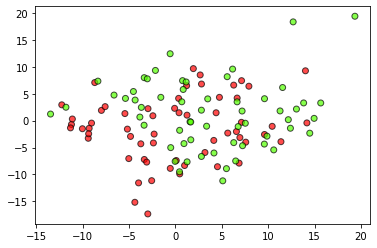

In [153]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

plt.show()

In [50]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       336
           1       0.09      0.50      0.15        20

    accuracy                           0.68       356
   macro avg       0.52      0.60      0.48       356
weighted avg       0.91      0.68      0.77       356



In [51]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.81       336
           1       0.10      0.55      0.16        20

    accuracy                           0.69       356
   macro avg       0.53      0.62      0.49       356
weighted avg       0.91      0.69      0.77       356



Condensed nearest neighbour

In [52]:
import warnings
warnings.simplefilter("ignore")

cnn = CondensedNearestNeighbour(random_state=42, n_jobs = -1)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 152, 1: 59})


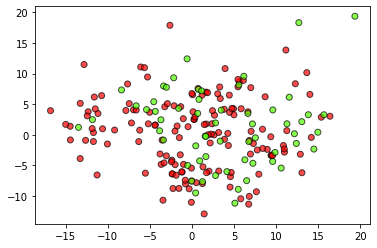

In [53]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [54]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       336
           1       0.19      0.30      0.24        20

    accuracy                           0.89       356
   macro avg       0.58      0.61      0.59       356
weighted avg       0.91      0.89      0.90       356



In [55]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.33      0.35      0.34        20

    accuracy                           0.92       356
   macro avg       0.65      0.65      0.65       356
weighted avg       0.93      0.92      0.93       356



Tomek Links

In [56]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 974, 1: 59})


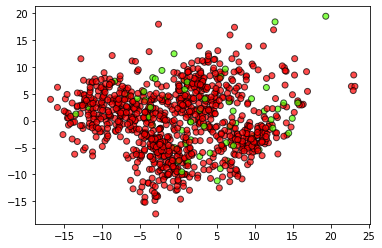

In [57]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [58]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.40      0.10      0.16        20

    accuracy                           0.94       356
   macro avg       0.67      0.55      0.56       356
weighted avg       0.92      0.94      0.92       356



In [59]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       336
           1       0.40      0.20      0.27        20

    accuracy                           0.94       356
   macro avg       0.68      0.59      0.62       356
weighted avg       0.92      0.94      0.93       356



Edited Nearest Neighbour

In [60]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 919, 1: 59})


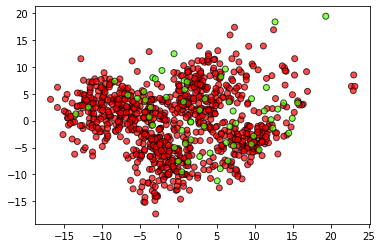

In [61]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [62]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.33      0.10      0.15        20

    accuracy                           0.94       356
   macro avg       0.64      0.54      0.56       356
weighted avg       0.91      0.94      0.92       356



In [63]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       336
           1       0.21      0.20      0.21        20

    accuracy                           0.91       356
   macro avg       0.58      0.58      0.58       356
weighted avg       0.91      0.91      0.91       356



Cluster Centroids

In [64]:
from sklearn.cluster import KMeans
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(
    estimator=KMeans(n_init=1, random_state=0), random_state=42 # minibatch version is faster than Kmeans
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59, 1: 59})


In [65]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       336
           1       0.20      0.15      0.17        20

    accuracy                           0.92       356
   macro avg       0.58      0.56      0.56       356
weighted avg       0.91      0.92      0.91       356



In [66]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.43      0.59       336
           1       0.05      0.55      0.10        20

    accuracy                           0.44       356
   macro avg       0.50      0.49      0.34       356
weighted avg       0.89      0.44      0.56       356



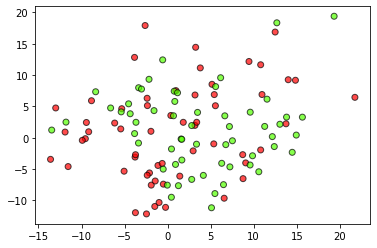

In [67]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.legend([0,1])
plt.show()

# Esperimento 2: Oversampling + Dim.Reduction + New classification with tuned hyperparameters

Random oversampler

In [68]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


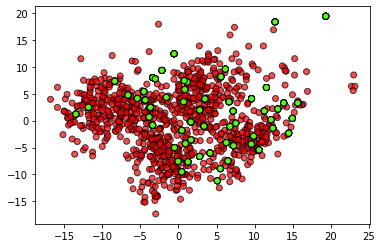

In [69]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [70]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.40      0.10      0.16        20

    accuracy                           0.94       356
   macro avg       0.67      0.55      0.56       356
weighted avg       0.92      0.94      0.92       356



In [71]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       336
           1       0.06      0.15      0.09        20

    accuracy                           0.82       356
   macro avg       0.50      0.51      0.49       356
weighted avg       0.89      0.82      0.86       356



smote

In [119]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 984})


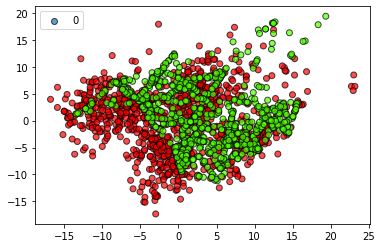

In [120]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.legend([0,1])
plt.show()

In [74]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       336
           1       0.12      0.30      0.17        20

    accuracy                           0.83       356
   macro avg       0.53      0.58      0.54       356
weighted avg       0.91      0.83      0.86       356



In [75]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       336
           1       0.17      0.20      0.18        20

    accuracy                           0.90       356
   macro avg       0.56      0.57      0.56       356
weighted avg       0.91      0.90      0.90       356



adasyn

In [76]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 983})


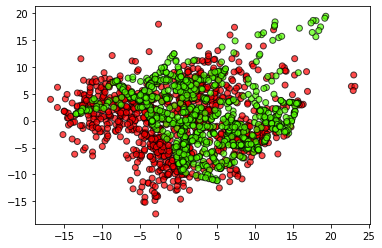

In [77]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [78]:
classifier = learner_KNN.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       336
           1       0.13      0.35      0.19        20

    accuracy                           0.84       356
   macro avg       0.55      0.61      0.55       356
weighted avg       0.91      0.84      0.87       356



In [79]:
classifier = learner_DT.fit(X_res, y_res)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       336
           1       0.23      0.35      0.27        20

    accuracy                           0.90       356
   macro avg       0.59      0.64      0.61       356
weighted avg       0.92      0.90      0.91       356



# Dimensionality Reduction (Feature Selection)

In [80]:
from sklearn.feature_selection import VarianceThreshold

In [81]:
#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25, 1]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

0.02
(1043, 265)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.04
(1043, 265)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.06
(1043, 265)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.08
(1043, 263)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.1
(1043, 263)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.12
(1043, 262)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9410112359550562
KNN - F1 Score 0.5647161572052402
0.15
(1043, 257)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accura

In [82]:
# Proviamo lo stesso esperimento però sui dati non normalizzati

df_train_pure=pd.read_csv("./Dataset_prepared/Prepared_train.csv")
df_test_pure=pd.read_csv("./Dataset_prepared/Prepared_test.csv")

df_train_pure.drop('actor',axis=1,inplace=True)
df_train_pure.drop('filename',axis=1,inplace=True)

df_test_pure.drop('actor',axis=1,inplace=True)
df_test_pure.drop('filename',axis=1,inplace=True)

le=preprocessing.LabelEncoder()
c = ["statement","repetition","sex","emotional_intensity","vocal_channel"]
for i in c:
    df_train_pure[i]=le.fit_transform(df_train_pure[i])

for i in c:
    df_test_pure[i]=le.fit_transform(df_test_pure[i])
df_train_pure = pd.get_dummies(df_train_pure, columns=categorical_col)

df_test_pure = pd.get_dummies(df_test_pure, columns=categorical_col)   
col=[x for x in df_train_pure.columns if x!="emotional_intensity"]


   
X_train_pure=df_train_pure[col].values
y_train_pure = np.array(df_train_pure["emotional_intensity"])

X_test_pure=df_test_pure[col].values
y_test_pure = np.array(df_test_pure["emotional_intensity"])



#Let's test different Threshold for DT and KNN
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.25,0.50,0.70]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train_pure)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test_pure)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train_pure)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test_pure, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test_pure, y_pred,average="macro"))




0.02
(1828, 191)
DT - Accuracy 0.7035256410256411
DT - F1 Score 0.7031894789617801
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.04
(1828, 187)
DT - Accuracy 0.6923076923076923
DT - F1 Score 0.6916869106929633
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.06
(1828, 182)
DT - Accuracy 0.6971153846153846
DT - F1 Score 0.6969838671966332
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.08
(1828, 178)
DT - Accuracy 0.7243589743589743
DT - F1 Score 0.723438466295609
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.1
(1828, 177)
DT - Accuracy 0.7211538461538461
DT - F1 Score 0.7201158966004351
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.12
(1828, 174)
DT - Accuracy 0.717948717948718
DT - F1 Score 0.71689883794067
KNN - Accuracy 0.5576923076923077
KNN - F1 Score 0.5487170887137347
0.15
(1828, 165)
DT - Accuracy 0.6746794871794872
DT - F1 Score 0.6706524706524707
KNN - Accuracy 0

Univariate Feature Selection 

In [83]:
from sklearn.feature_selection import SelectKBest


In [84]:
#Let's test different Threshold for DT and KNN
for i in range(20, 60):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
(1043, 20)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9297752808988764
KNN - F1 Score 0.6243933319265668
21
(1043, 21)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9213483146067416
KNN - F1 Score 0.5904010519395135
22
(1043, 22)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5943447984806922
23
(1043, 23)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9325842696629213
KNN - F1 Score 0.6073529411764707
24
(1043, 24)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9297752808988764
KNN - F1 Score 0.6243933319265668
25
(1043, 25)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9185393258426966
KNN - F1 Score 0.6066598087400465
26
(1043, 26)
DT - Accuracy 0.9353932584269663
DT - F1 Score 0.6345784799393047
KNN - Accuracy 0.926966292134831

Selkect from model 

In [85]:
from sklearn.feature_selection import SelectFromModel


In [86]:
sel = SelectFromModel(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=20))
X_train_sel = sel.fit_transform(X_train, y_train)
print(f"New dimension:{X_train_sel.shape}\n")

X_test_sel = sel.transform(X_test)
clf =KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_sel, y_train)
y_pred = clf.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# Ho fatto selezione sul modello del decision tree e testato il knn nella nuova dimensione

New dimension:(1043, 12)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       336
           1       0.25      0.25      0.25        20

    accuracy                           0.92       356
   macro avg       0.60      0.60      0.60       356
weighted avg       0.92      0.92      0.92       356



Recursive Feature elimination

In [87]:
from sklearn.feature_selection import RFE

In [88]:
#Let's test different k range for DT and KNN
for i in range(20, 60):
    print(str(i))

    sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=i)
    X_train_sel = sel.fit_transform(X_train, y_train)
    print(f" DT New dimension: {X_train_sel.shape}")
    X_test_sel = sel.transform(X_test)

    learner= DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('DT - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DT - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

    learner= KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
    learner.fit(X_train_sel, y_train)
    y_pred = learner.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('KNN - F1 Score %s' % f1_score(y_test, y_pred,average="macro"))

20
 DT New dimension: (1043, 20)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.5984730175255943
21
 DT New dimension: (1043, 21)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9325842696629213
KNN - F1 Score 0.6073529411764707
22
 DT New dimension: (1043, 22)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9269662921348315
KNN - F1 Score 0.5984730175255943
23
 DT New dimension: (1043, 23)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9353932584269663
KNN - F1 Score 0.6121453270806688
24
 DT New dimension: (1043, 24)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.5943447984806922
25
 DT New dimension: (1043, 25)
DT - Accuracy 0.9382022471910112
DT - F1 Score 0.6172043010752688
KNN - Accuracy 0.9241573033707865
KNN - F1 Score 0.594344798480692

# DIMENSIONALITY REDUCTION ( FEATURE PROJECTION)

PCA

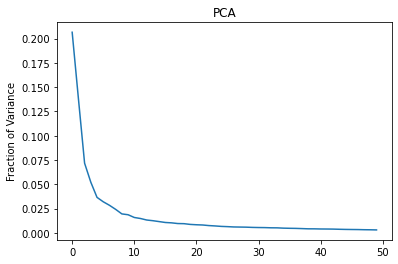

In [89]:
plt.plot(PCA(n_components=50).fit(X_train,y_train).explained_variance_ratio_)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [90]:
pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [91]:
X_test_pca = pca.transform(X_test)
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       336
           1       1.00      0.05      0.10        20

    accuracy                           0.95       356
   macro avg       0.97      0.53      0.53       356
weighted avg       0.95      0.95      0.92       356



In [92]:
X_test_pca = pca.transform(X_test)
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       336
           1       0.20      0.05      0.08        20

    accuracy                           0.94       356
   macro avg       0.57      0.52      0.52       356
weighted avg       0.90      0.94      0.92       356



Random subspace projection 

In [93]:
from sklearn import random_projection

rsp = random_projection.GaussianRandomProjection(n_components=30, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(1043, 30)

In [94]:
X_test_rsp = rsp.transform(X_test)
clf =DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       336
           1       0.15      0.15      0.15        20

    accuracy                           0.90       356
   macro avg       0.55      0.55      0.55       356
weighted avg       0.90      0.90      0.90       356



In [95]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_rsp, y_train)
y_pred = clf.predict(X_test_rsp)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       336
           1       0.15      0.10      0.12        20

    accuracy                           0.92       356
   macro avg       0.55      0.53      0.54       356
weighted avg       0.90      0.92      0.91       356



Multidimensional scaling

In [165]:
from sklearn.manifold import MDS
mds = MDS(n_components=20) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(1043, 33)

In [170]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       984
           1       0.85      0.19      0.31        59

    accuracy                           0.95      1043
   macro avg       0.90      0.59      0.64      1043
weighted avg       0.95      0.95      0.94      1043



In [98]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



ISOMAP

In [99]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=20)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(1043, 20)

In [100]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       984
           1       0.05      0.05      0.05        59

    accuracy                           0.89      1043
   macro avg       0.49      0.49      0.49      1043
weighted avg       0.89      0.89      0.89      1043



In [101]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_iso)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       984
           1       0.04      0.05      0.04        59

    accuracy                           0.87      1043
   macro avg       0.49      0.48      0.49      1043
weighted avg       0.89      0.87      0.88      1043



t-SNE

In [102]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(1043, 3)

In [103]:
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9434324065196549
F1-score [0.97089295 0.        ]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       984
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1043
   macro avg       0.47      0.50      0.49      1043
weighted avg       0.89      0.94      0.92      1043



In [104]:
clf = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 1.0
F1-score [1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       984
           1       1.00      1.00      1.00        59

    accuracy                           1.00      1043
   macro avg       1.00      1.00      1.00      1043
weighted avg       1.00      1.00      1.00      1043



# Now we build two models with  the best sampling technics + best reduction technics based on the previous experiments

Voglio provare adasyn + Tomek

In [154]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 983})


In [156]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))


(1967, 33)
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       336
           1       0.08      0.30      0.12        20

    accuracy                           0.76       356
   macro avg       0.51      0.55      0.49       356
weighted avg       0.90      0.76      0.82       356



In [157]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       336
           1       0.08      0.30      0.12        20

    accuracy                           0.76       356
   macro avg       0.51      0.55      0.49       356
weighted avg       0.90      0.76      0.82       356



In [176]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 974, 1: 59})


In [163]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(k=33)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)
learner =  DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15)
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))




(1033, 33)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       336
           1       0.38      0.25      0.30        20

    accuracy                           0.94       356
   macro avg       0.67      0.61      0.63       356
weighted avg       0.92      0.94      0.93       356



In [164]:
learner_KNN = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       336
           1       0.38      0.25      0.30        20

    accuracy                           0.94       356
   macro avg       0.67      0.61      0.63       356
weighted avg       0.92      0.94      0.93       356



In [184]:
from sklearn.feature_selection import RFE

sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1033, 20)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       336
           1       0.33      0.20      0.25        20

    accuracy                           0.93       356
   macro avg       0.64      0.59      0.61       356
weighted avg       0.92      0.93      0.92       356



In [185]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 984, 1: 983})


In [186]:
sel = RFE(DecisionTreeClassifier(max_depth=15,min_samples_leaf=10,min_samples_split=15), n_features_to_select=20)
X_train_sel = sel.fit_transform(X_res, y_res)
print(f" DT New dimension: {X_train_sel.shape}")
X_test_sel = sel.transform(X_test)

learner = KNeighborsClassifier(n_neighbors= 2, metric= 'euclidean', weights= 'distance')
learner.fit(X_train_sel, y_res)
y_pred = learner.predict(X_test_sel)
print(classification_report(y_test,y_pred))

 DT New dimension: (1967, 20)
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       336
           1       0.13      0.40      0.19        20

    accuracy                           0.81       356
   macro avg       0.54      0.62      0.54       356
weighted avg       0.91      0.81      0.85       356

